# Explorative Data Analysis

In [26]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [4]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349,7.456260
std,144450.150010,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218,0.887295
min,1.000000,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121,0.000000
25%,124772.500000,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289,6.798341
50%,250002.500000,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909,7.496503
75%,375226.500000,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870,8.161166
max,499999.000000,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370,0.873579,10.309208


In [40]:
from plotnine import ggplot, geom_point, aes
from plotnine.geoms import geom_histogram, geom_bar, geom_boxplot, geom_bin2d, geom_density_2d, geom_violin
from plotnine.labels import ggtitle

In [6]:
cont_cols = [x for x in train.columns if x.startswith('cont')]
cont_cols

['cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13']

In [7]:
cat_cols = [x for x in train.columns if x.startswith('cat')]
cat_cols

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9']

# Univariate analysis

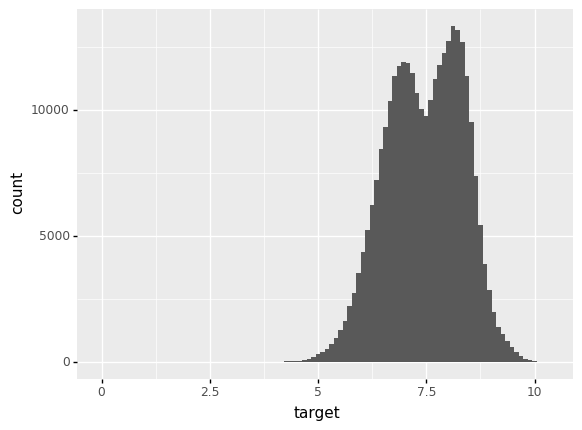

<ggplot: (8763853747776)>

In [8]:
ggplot(train, aes(x='target'))+geom_histogram(bins=100)

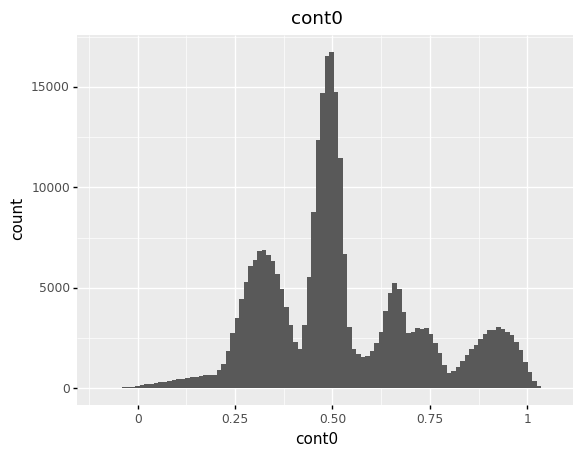

<ggplot: (8763839651663)>


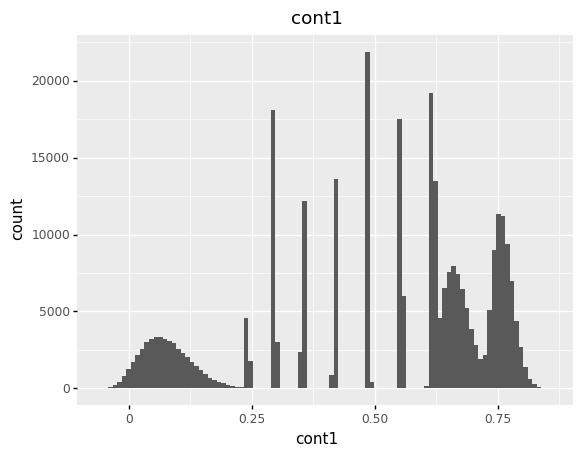

<ggplot: (8763830584058)>


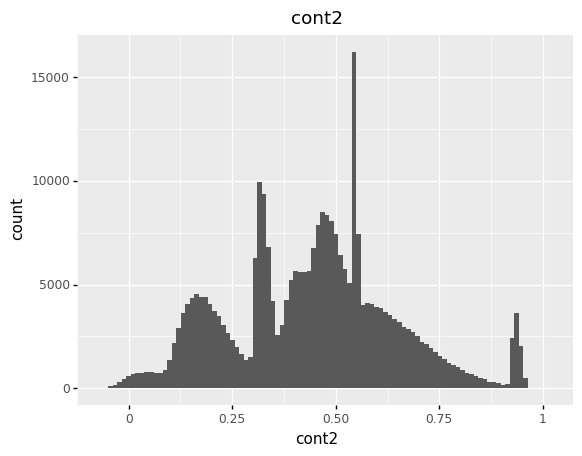

<ggplot: (8763830683534)>


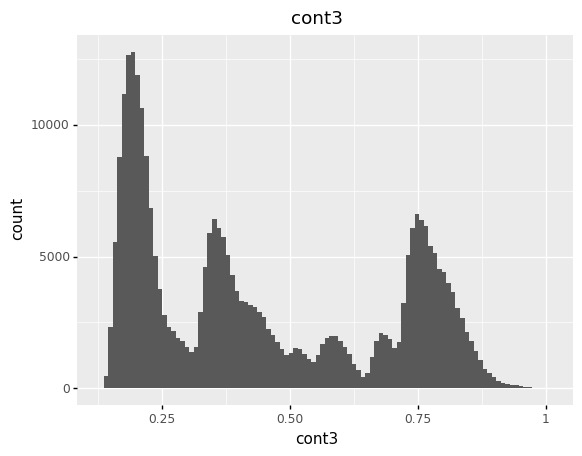

<ggplot: (8763839083045)>


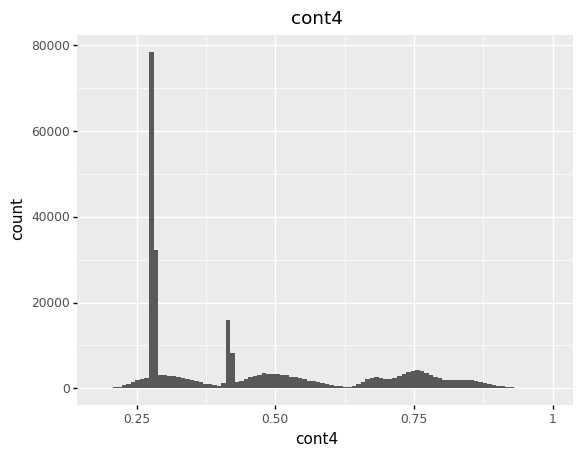

<ggplot: (8763839695749)>


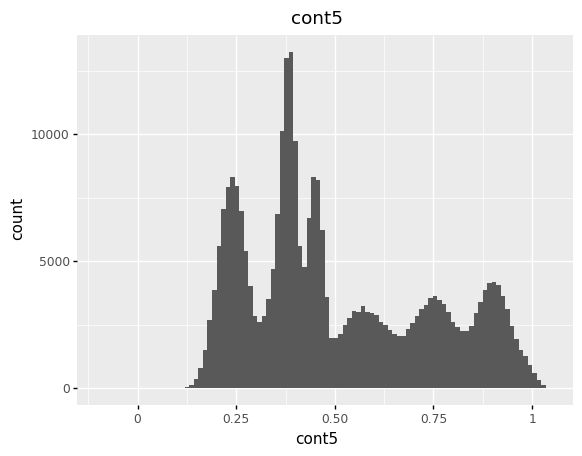

<ggplot: (8763839856875)>


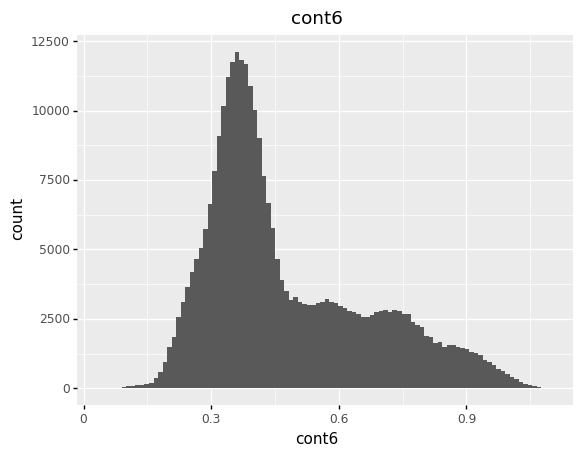

<ggplot: (8763839681633)>


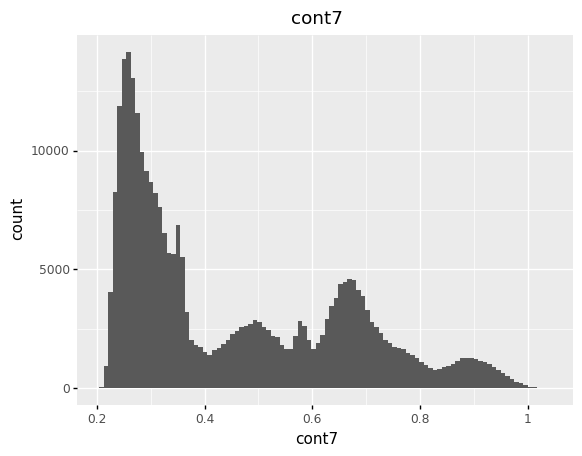

<ggplot: (8763839553211)>


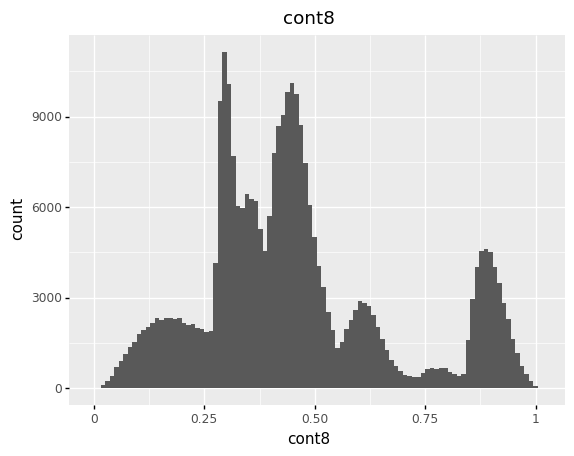

<ggplot: (8763839323076)>


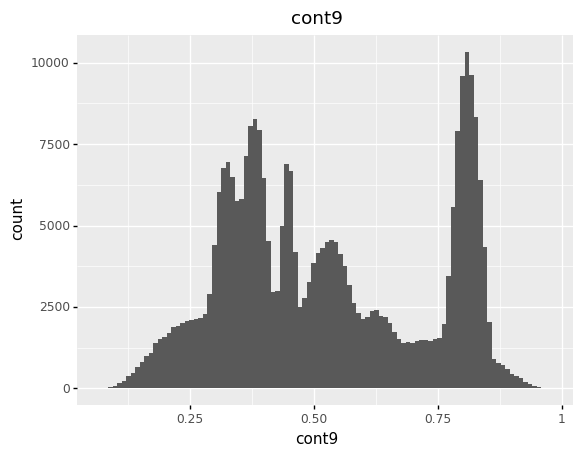

<ggplot: (8763839383760)>


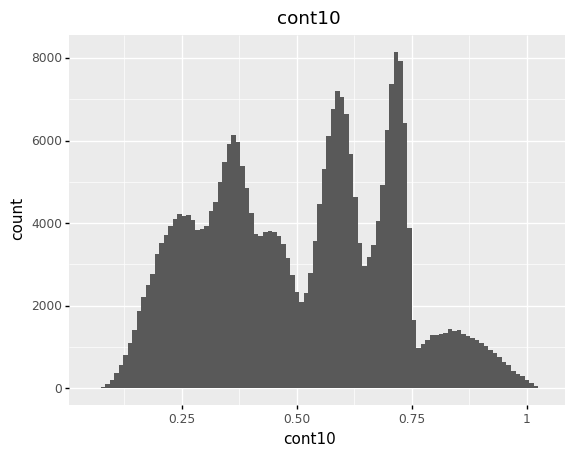

<ggplot: (8763839633137)>


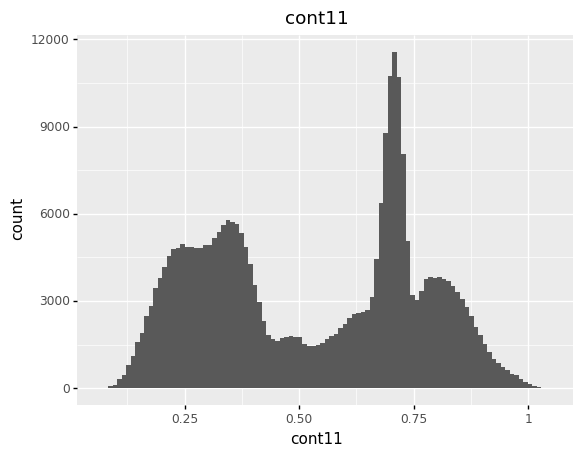

<ggplot: (8763839681633)>


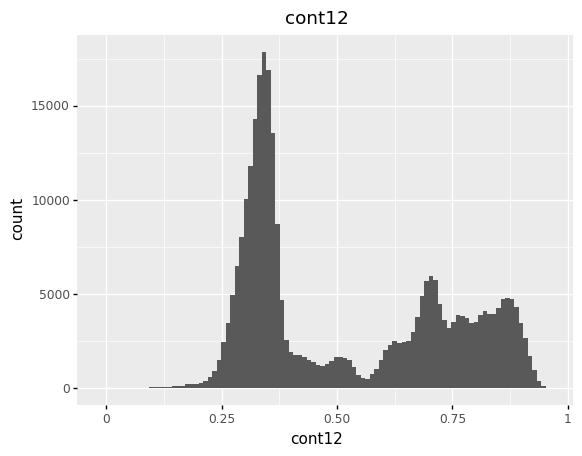

<ggplot: (8763830773604)>


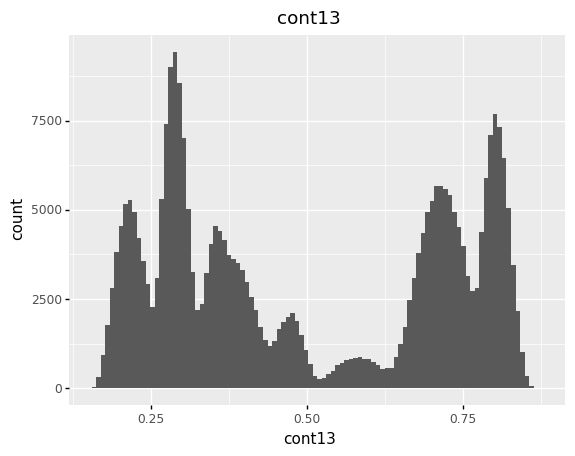

<ggplot: (8763839080798)>


In [29]:
for cont in cont_cols:
    print(ggplot(train, aes(x=cont))+geom_histogram(bins=100)+ggtitle(cont))

In [16]:
train.loc[(train['cont1']<0.5) & (train['cont1']>0.4),'cont1']

8         0.486993
35        0.488230
37        0.485373
45        0.487927
60        0.419198
            ...   
299967    0.486610
299970    0.418907
299977    0.420048
299989    0.420366
299991    0.418143
Name: cont1, Length: 36826, dtype: float64

In [10]:
train[cat_cols].describe(include='all')

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2,2,2,4,4,4,8,8,7,15
top,A,A,A,C,B,B,A,E,C,F
freq,281471,162678,276551,183752,297373,149208,292643,267631,121054,107281


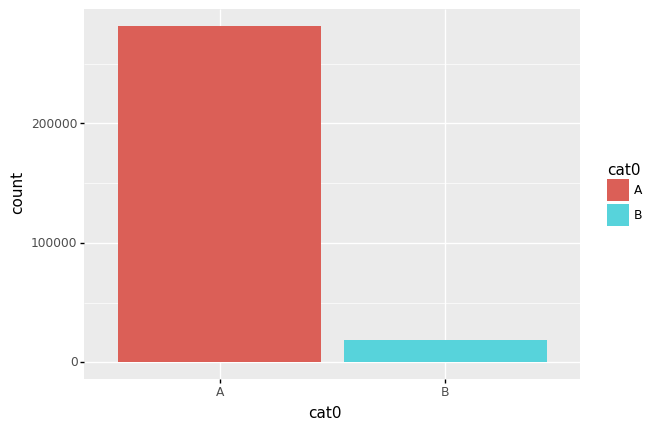

<ggplot: (8735577030397)>


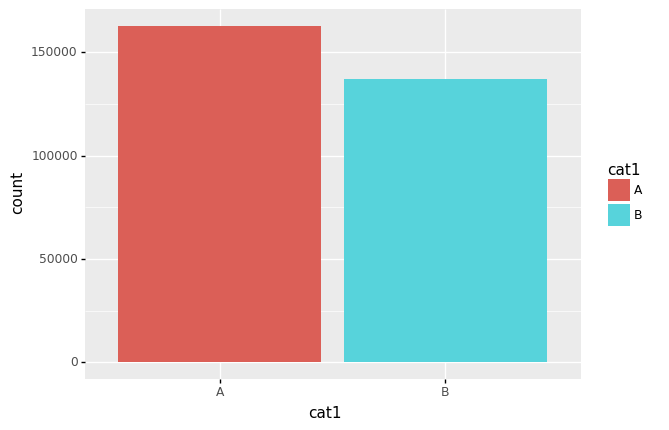

<ggplot: (8735577018224)>


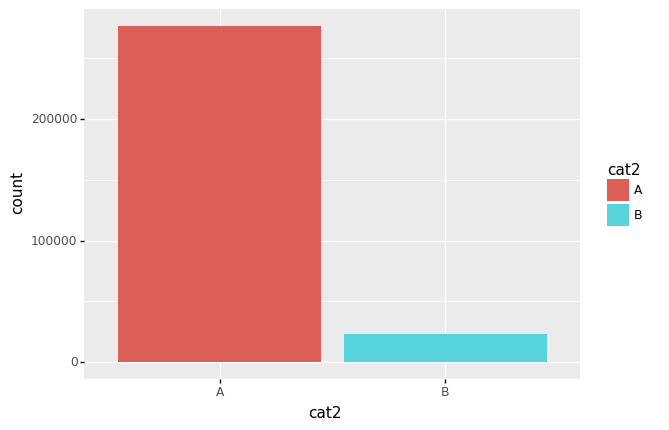

<ggplot: (8735577006141)>


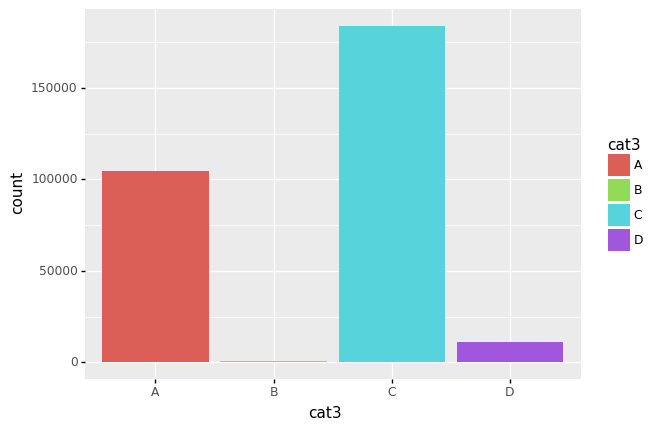

<ggplot: (8735577049387)>


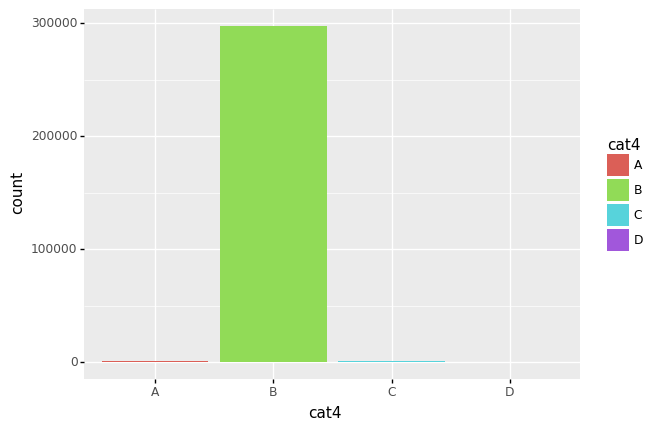

<ggplot: (8735577011583)>


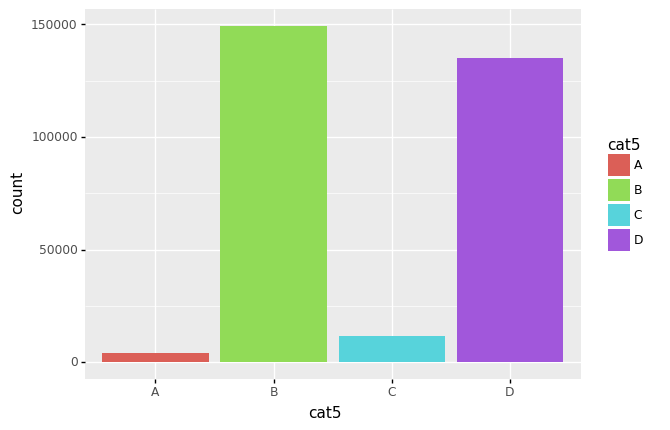

<ggplot: (8735577014378)>


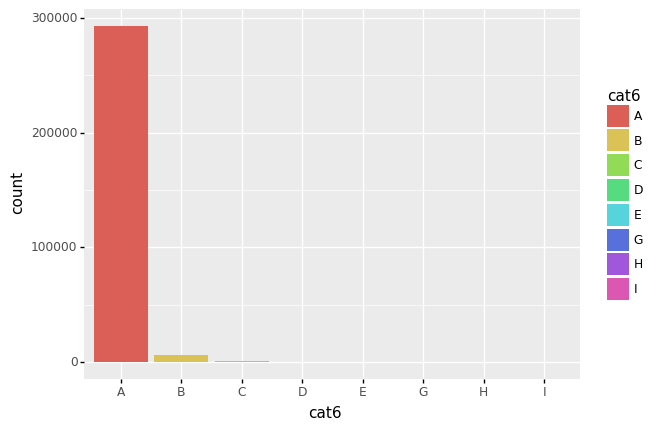

<ggplot: (8735576983203)>


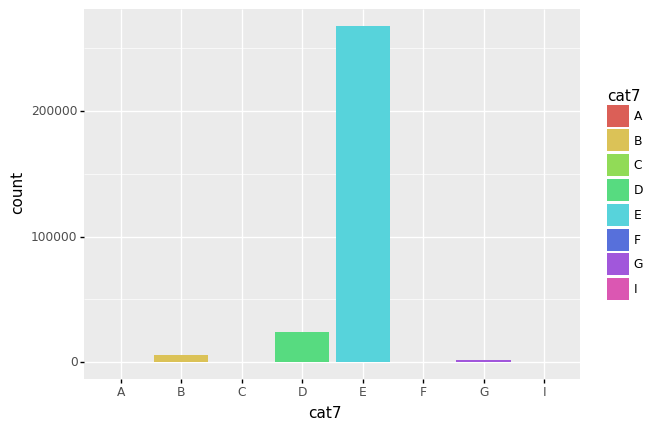

<ggplot: (8735576970144)>


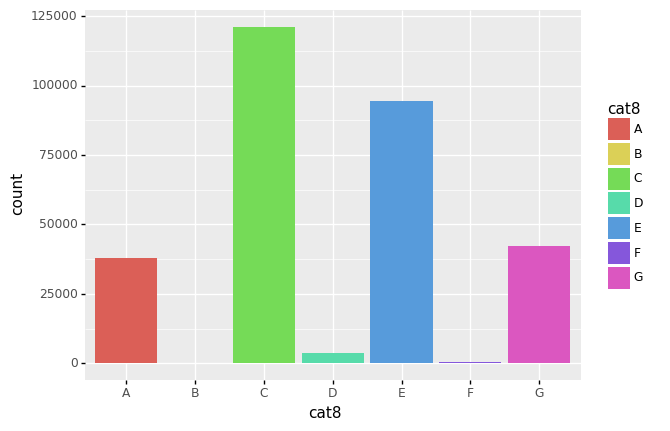

<ggplot: (8735574700541)>


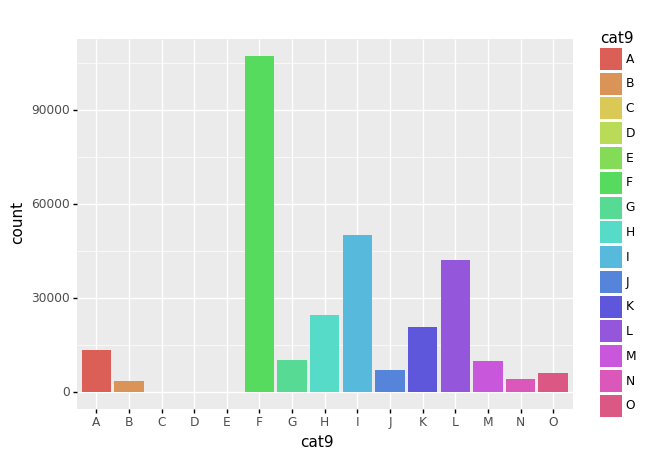

<ggplot: (8735574740342)>


In [11]:
for cat in cat_cols:
    train[cat] = train[cat].astype("category")
    print(ggplot(train, aes(x=cat, fill=cat))+geom_bar())

# Target vs single features

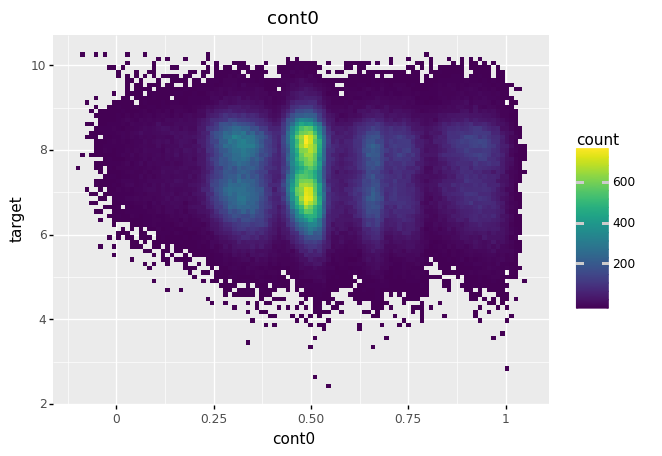

<ggplot: (8763839178978)>


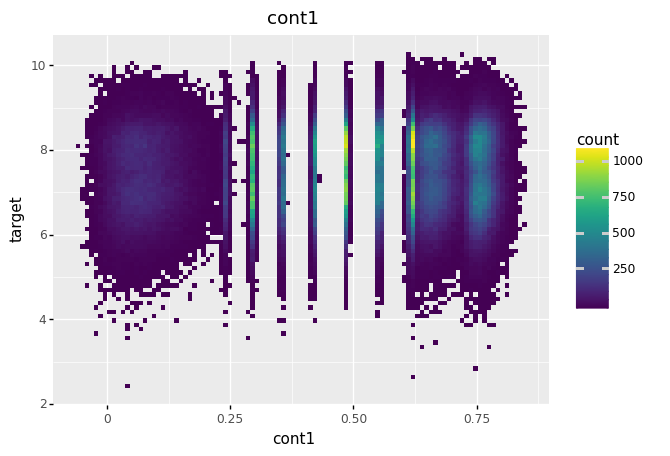

<ggplot: (8763839651780)>


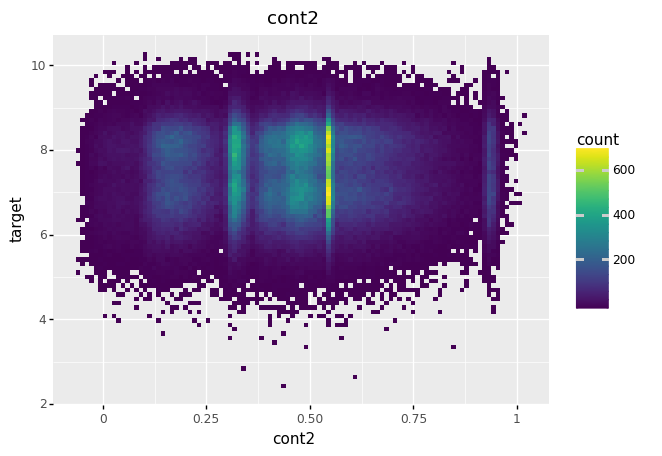

<ggplot: (8763839651705)>


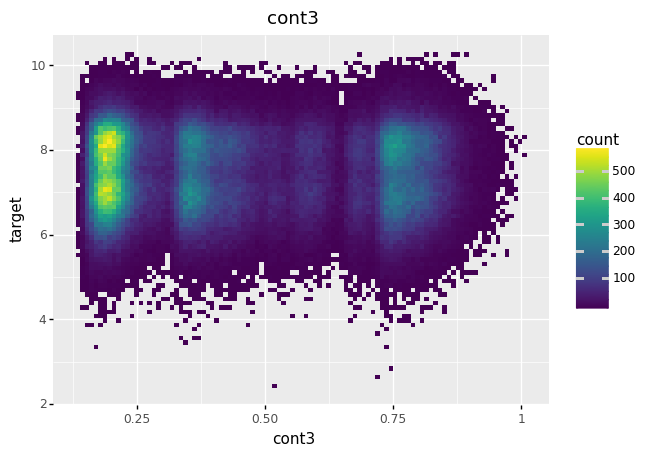

<ggplot: (8763839725291)>


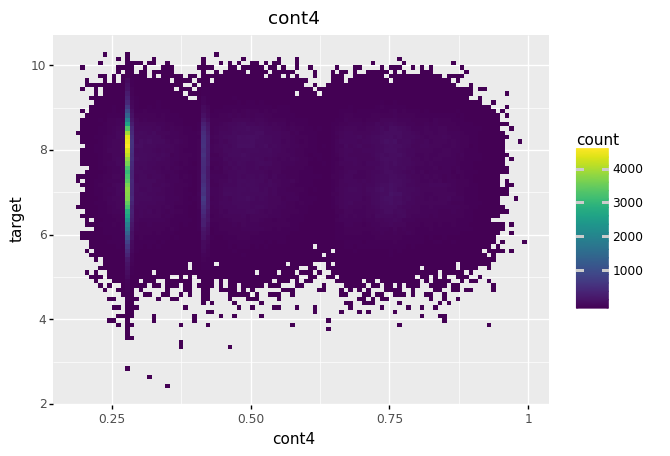

<ggplot: (8763839651780)>


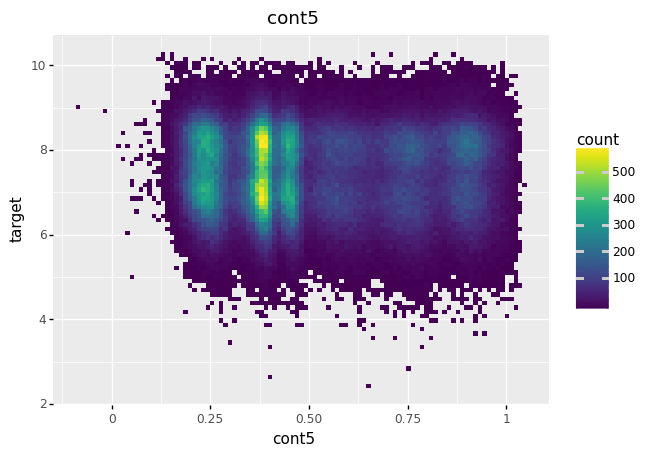

<ggplot: (8763839350122)>


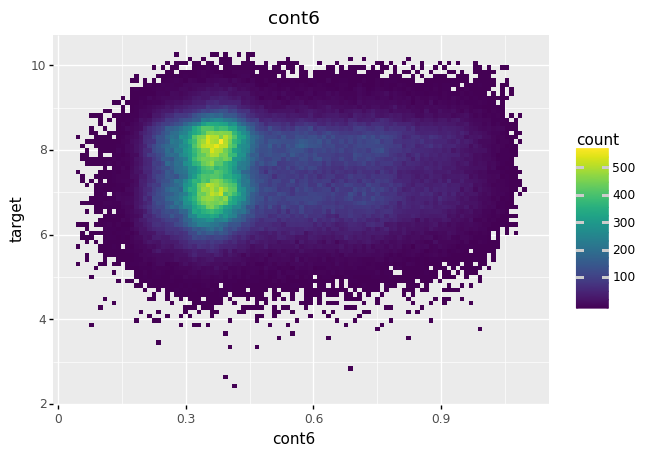

<ggplot: (8763839663186)>


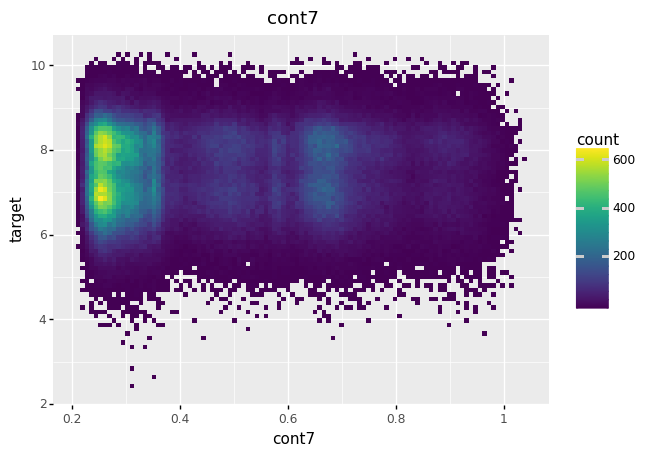

<ggplot: (8763791376315)>


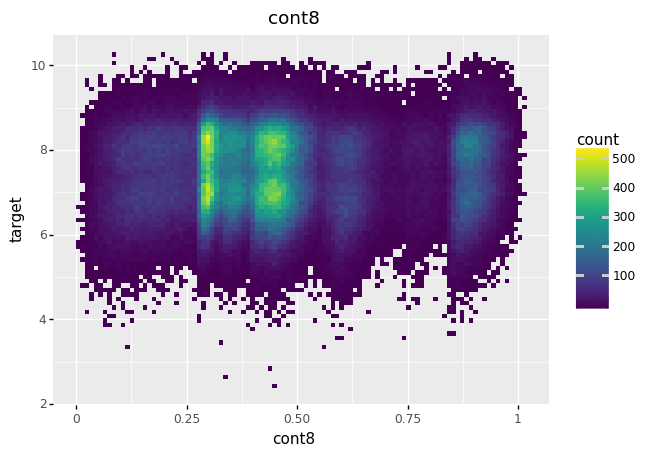

<ggplot: (8763839663183)>


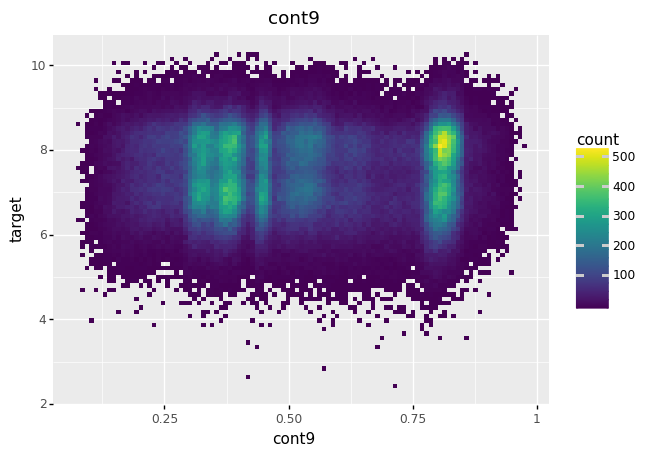

<ggplot: (8763839745244)>


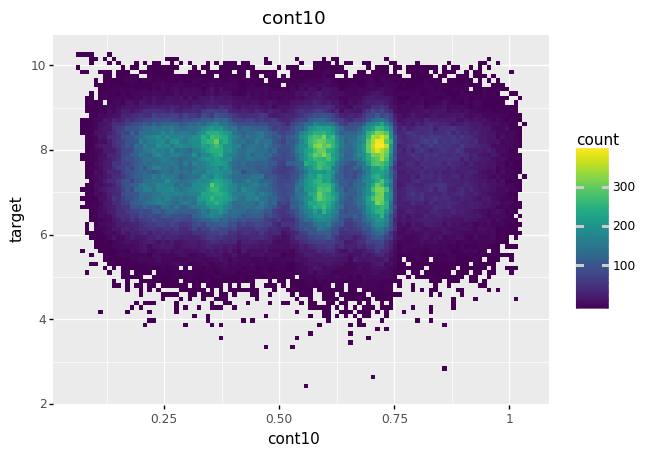

<ggplot: (8763839145144)>


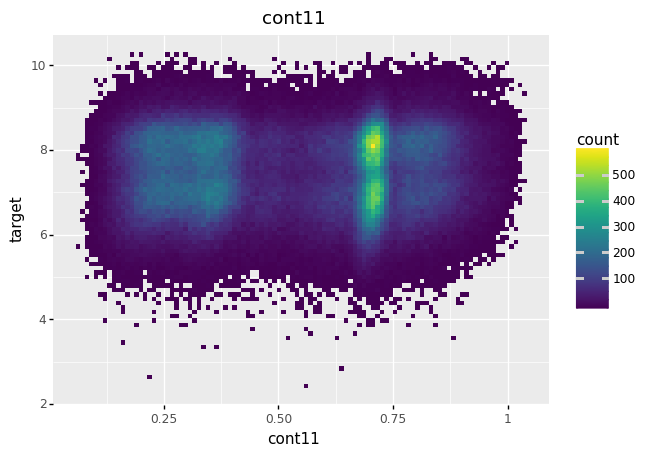

<ggplot: (8763822171986)>


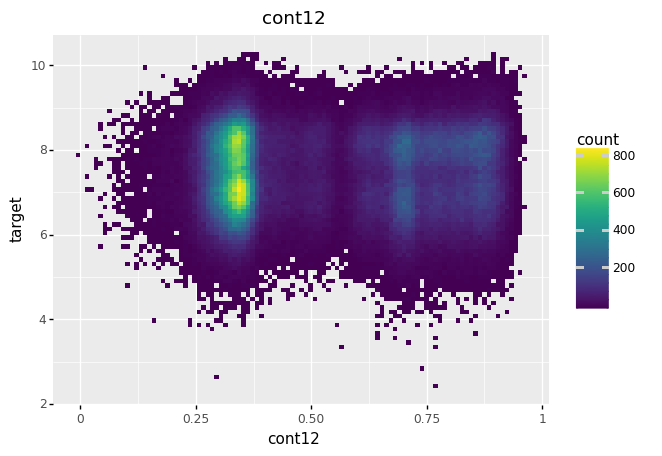

<ggplot: (8763839332100)>


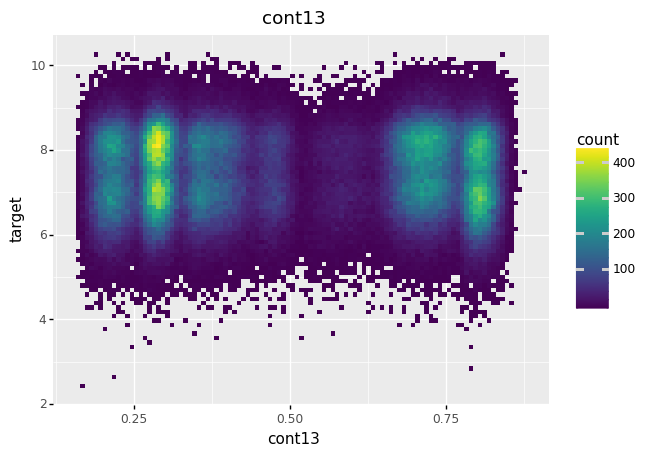

<ggplot: (8763839520181)>


In [38]:
for cont in cont_cols:
    print(ggplot(train, aes(x=cont, y='target'))+geom_bin2d(bins=100)+ggtitle(cont))

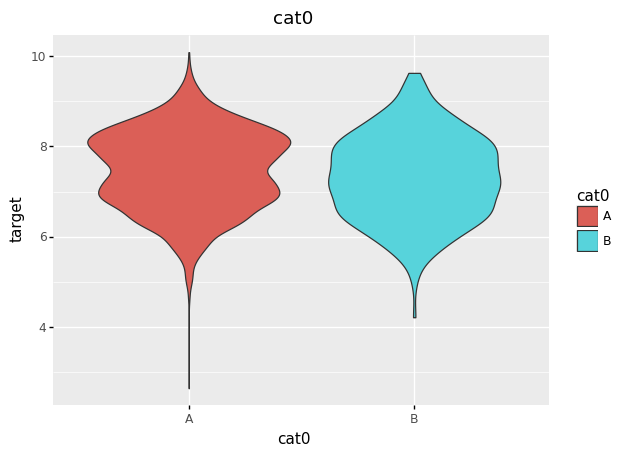

<ggplot: (8763822169248)>


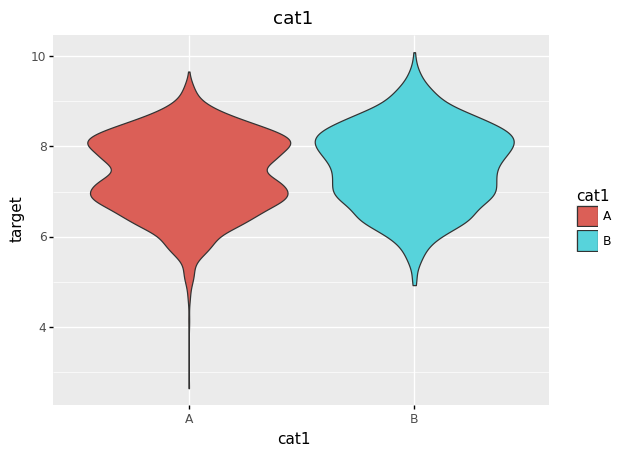

<ggplot: (8763830511547)>


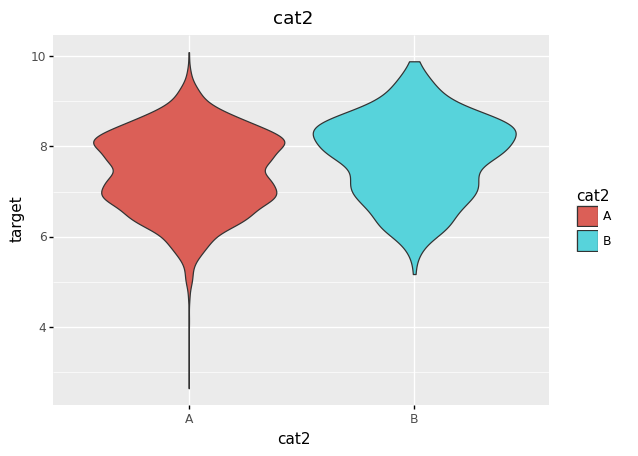

<ggplot: (8763839049084)>


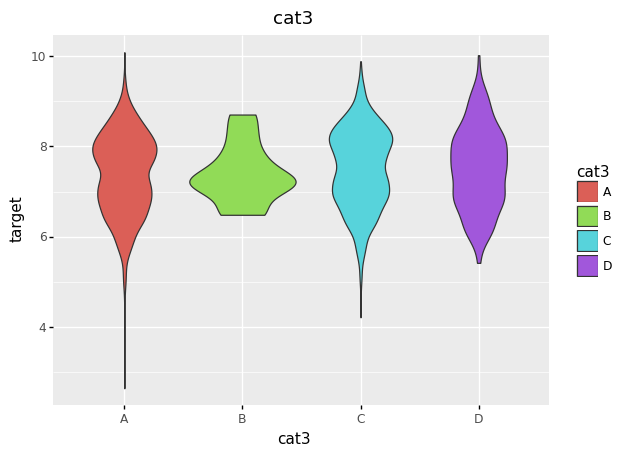

<ggplot: (8763791606215)>


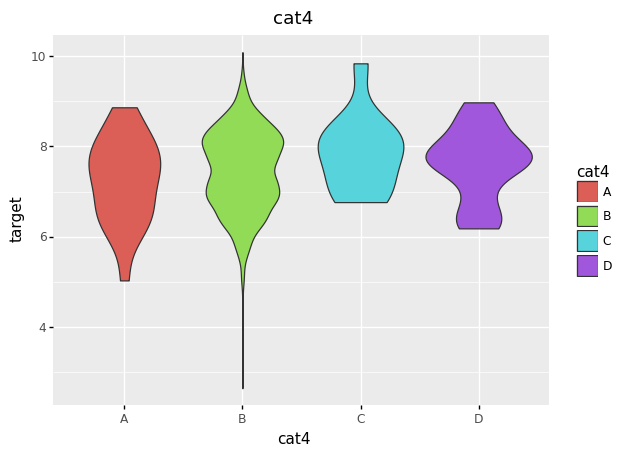

<ggplot: (8763830707981)>


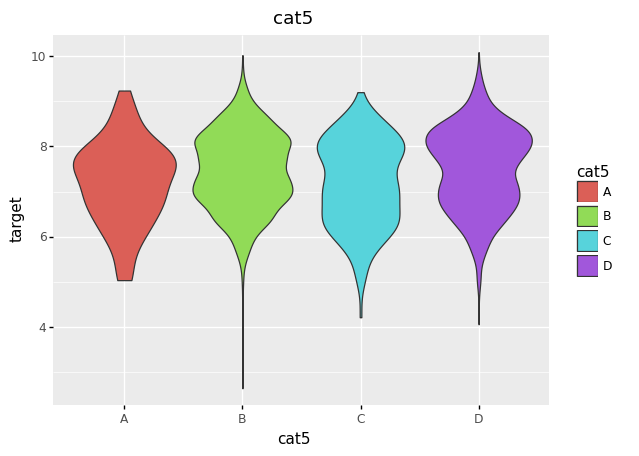

<ggplot: (8763822169134)>


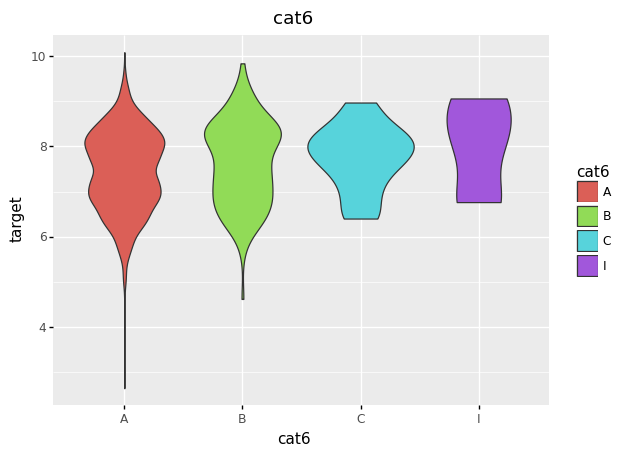

<ggplot: (8763791245891)>


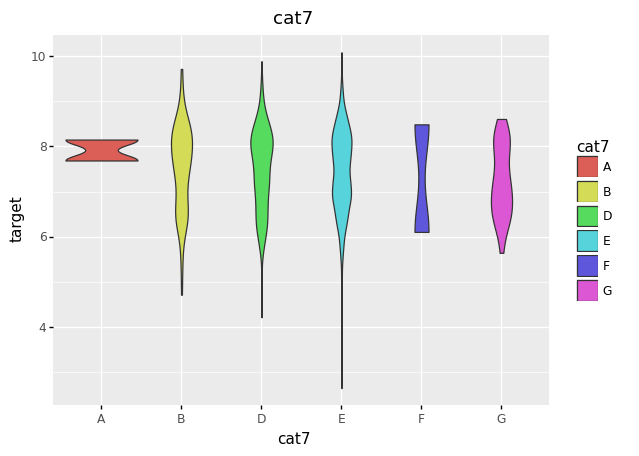

<ggplot: (8763839194161)>


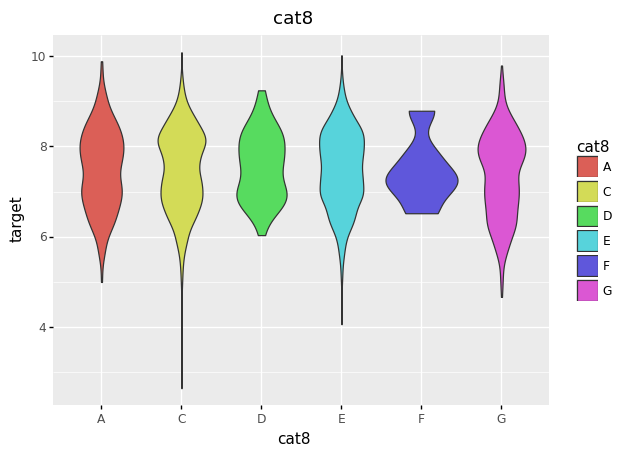

<ggplot: (8763790932749)>


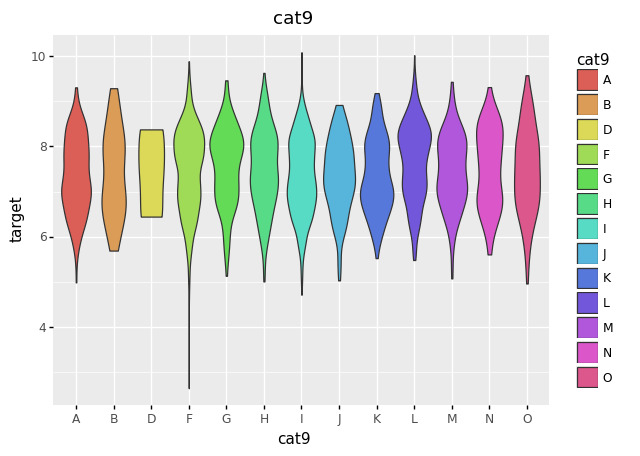

<ggplot: (8763839304003)>


In [41]:
for cat in cat_cols:
    print(ggplot(train_sample, aes(x=cat, fill=cat, y='target'))+geom_violin()+ggtitle(cat))

# Peaks and categorical vars?

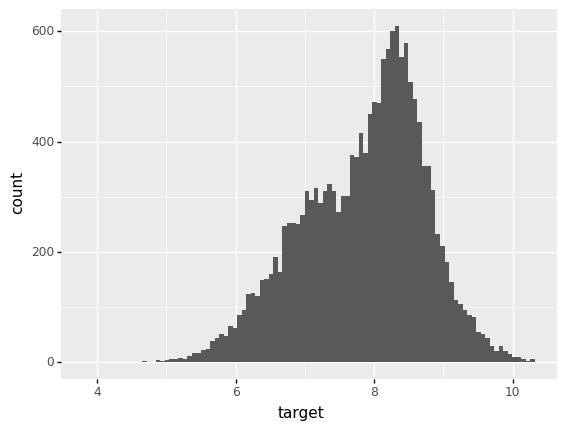

<ggplot: (8763839626701)>

In [47]:
ggplot(train[(train['cat1']=='B') & (train['cat2']=='B')], aes(x='target'))+geom_histogram(bins=100)